In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Step 2: Load the saved training and testing data
train_data = pd.read_csv("train_multi_output.csv")
test_data = pd.read_csv("test_multi_output.csv")

# Step 3: Separate features (X) and target variables (y)
X_train = train_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'Humidity', 'Temperature']]
y_train = train_data[['PV_production', 'Wind_production']]

X_test = test_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'Humidity', 'Temperature']]
y_test = test_data[['PV_production', 'Wind_production']] 

# Step 4: Feature Scaling (StandardScaler)
scaler = StandardScaler()

# Fit scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define the base SVR model
svr_base = SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.2)

# Step 6: Wrap SVR in MultiOutputRegressor
svr_model = MultiOutputRegressor(svr_base)

# Step 7: Train the model
svr_model.fit(X_train_scaled, y_train)

# Step 8: Make predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Step 9: Evaluate the model
# Step 9: Evaluate the model with all metrics

# MAE - Mean Absolute Error
mae_pv_svr = mean_absolute_error(y_test['PV_production'], y_pred_svr[:, 0])
mae_wind_svr = mean_absolute_error(y_test['Wind_production'], y_pred_svr[:, 1])

# RMSE - Root Mean Squared Error
rmse_pv_svr = np.sqrt(mean_squared_error(y_test['PV_production'], y_pred_svr[:, 0]))
rmse_wind_svr = np.sqrt(mean_squared_error(y_test['Wind_production'], y_pred_svr[:, 1]))

# R² - Coefficient of Determination
r2_pv_svr = r2_score(y_test['PV_production'], y_pred_svr[:, 0])
r2_wind_svr = r2_score(y_test['Wind_production'], y_pred_svr[:, 1])

# MSE - Mean Squared Error
mse_pv_svr = mean_squared_error(y_test['PV_production'], y_pred_svr[:, 0])
mse_wind_svr = mean_squared_error(y_test['Wind_production'], y_pred_svr[:, 1])

# Adjusted R² 
n = X_test.shape[0]  # Number of test samples 
p = X_test.shape[1]  # Number of features

adjusted_r2_pv_svr = 1 - ((1 - r2_pv_svr) * (n - 1) / (n - p - 1))
adjusted_r2_wind_svr = 1 - ((1 - r2_wind_svr) * (n - 1) / (n - p - 1))

# Print all evaluation metrics
print("~~~~~ Support Vector Regression (SVR) Results ~~~~~")
print(f"PV -> MAE: {mae_pv_svr:.2f}, MSE: {mse_pv_svr:.3f}, RMSE: {rmse_pv_svr:.2f}, R²: {r2_pv_svr:.3f}, Adjusted R²: {adjusted_r2_pv_svr:.3f}")
print(f"Wind -> MAE: {mae_wind_svr:.2f}, MSE: {mse_wind_svr:.3f}, RMSE: {rmse_wind_svr:.2f}, R²: {r2_wind_svr:.3f}, Adjusted R²: {adjusted_r2_wind_svr:.3f}")

~~~~~ Support Vector Regression (SVR) Results ~~~~~
PV -> MAE: 0.08, MSE: 0.010, RMSE: 0.10, R²: 0.910, Adjusted R²: 0.910
Wind -> MAE: 0.11, MSE: 0.017, RMSE: 0.13, R²: 0.671, Adjusted R²: 0.671


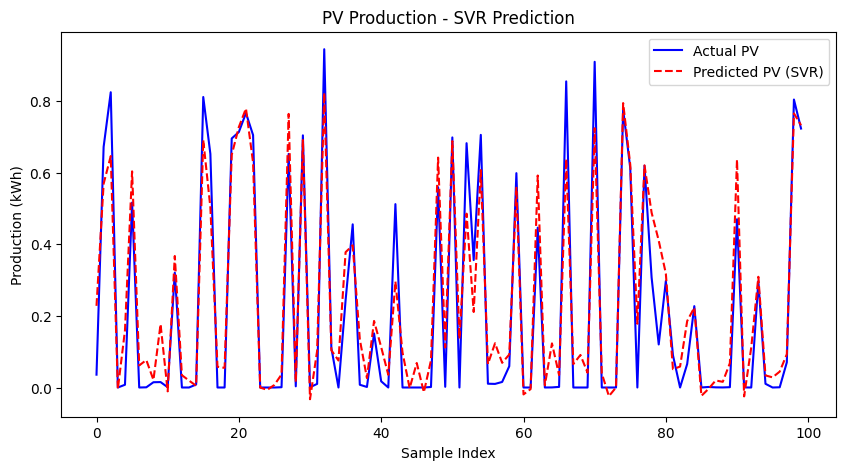

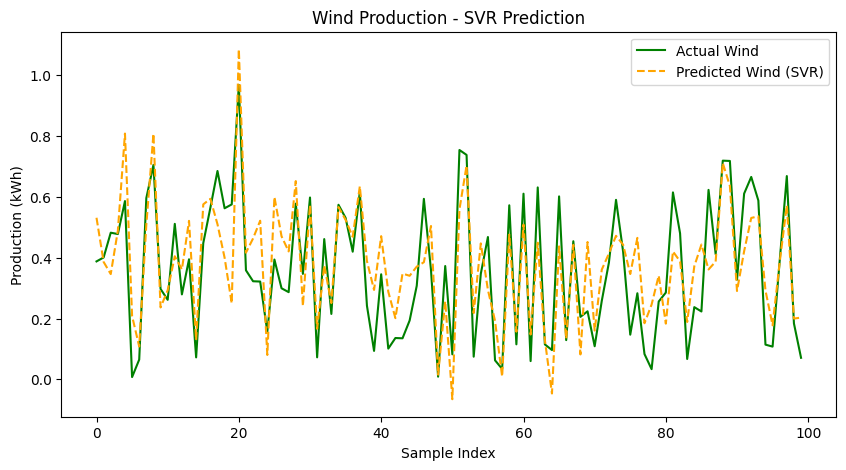

In [ ]:
# PV Production
plt.figure(figsize=(10,5))
plt.plot(y_test['PV_production'].values[:100], label='Actual PV', color='blue')
plt.plot(y_pred_svr[:100, 0], label='Predicted PV (SVR)', linestyle='--', color='red')
plt.title('PV Production - SVR Prediction')
plt.xlabel('Sample Index')
plt.ylabel('Production (kWh)')
plt.legend()
plt.show()

# Wind Production
plt.figure(figsize=(10,5))
plt.plot(y_test['Wind_production'].values[:100], label='Actual Wind', color='green')
plt.plot(y_pred_svr[:100, 1], label='Predicted Wind (SVR)', linestyle='--', color='orange')
plt.title('Wind Production - SVR Prediction')
plt.xlabel('Sample Index')
plt.ylabel('Production (kWh)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Initialize an empty dataframe or with previous results if needed
comparison_df = pd.DataFrame(columns=[
    'Model', 'PV_MAE', 'PV_RMSE', 'PV_R2', 
    'Wind_MAE', 'Wind_RMSE', 'Wind_R2'
])

# Append SVR results to comparison table
comparison_df = pd.concat([
    comparison_df,
    pd.DataFrame({
        'Model': ['SVR'],
        'PV_MAE': [mae_pv_svr],
        'PV_RMSE': [rmse_pv_svr],
        'PV_R2': [r2_pv_svr],
        'Wind_MAE': [mae_wind_svr],
        'Wind_RMSE': [rmse_wind_svr],
        'Wind_R2': [r2_wind_svr]
    })
], ignore_index=True)

# Print the updated comparison table
print("\n----- Updated Model Comparison -----")
print(comparison_df)


----- Updated Model Comparison -----
  Model    PV_MAE   PV_RMSE     PV_R2  Wind_MAE  Wind_RMSE  Wind_R2
0   SVR  0.079698  0.098058  0.910078  0.110491   0.131308   0.6712


C:\Users\HP\AppData\Local\Temp\ipykernel_16260\3485952666.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison_df = pd.concat([


In [ ]:
# # ============================================================
# # 📘 Hybrid SVR Experiment: RBF, Polynomial & Hybrid Kernels
# # ============================================================

# # Step 1: Import Libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.svm import SVR
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, linear_kernel

# # Step 2: Load Training & Testing Data
# train_data = pd.read_csv("train_multi_output.csv")
# test_data = pd.read_csv("test_multi_output.csv")

# # Step 3: Split Features and Targets
# X_train = train_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 
#                       'Wind_speed', 'Humidity', 'Temperature']]
# y_train = train_data[['PV_production', 'Wind_production']]

# X_test = test_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 
#                     'Wind_speed', 'Humidity', 'Temperature']]
# y_test = test_data[['PV_production', 'Wind_production']]

# # Step 4: Feature Scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # ============================================================
# # 📘 Define Custom Hybrid Kernel (RBF + Polynomial + Linear)
# # ============================================================
# def hybrid_kernel(X, Y):
#     K_rbf = rbf_kernel(X, Y, gamma=0.1)
#     K_poly = polynomial_kernel(X, Y, degree=3)
#     K_lin = linear_kernel(X, Y)
#     # Weighted sum of kernels (you can tune weights)
#     return 0.5 * K_rbf + 0.3 * K_poly + 0.2 * K_lin

# # ============================================================
# # ⚙️ Define All SVR Models (Different Kernels)
# # ============================================================
# models = {
#     "SVR_RBF": SVR(kernel='rbf', C=10, epsilon=0.2, gamma='scale'),
#     "SVR_Poly": SVR(kernel='poly', degree=3, C=10, epsilon=0.2),
#     "SVR_Hybrid": SVR(kernel=hybrid_kernel, C=10, epsilon=0.2)
# }

# # ============================================================
# # 🚀 Train, Predict & Evaluate Each Model
# # ============================================================
# comparison_df = pd.DataFrame(columns=[
#     'Model', 'PV_MAE', 'PV_RMSE', 'PV_R2', 
#     'Wind_MAE', 'Wind_RMSE', 'Wind_R2'
# ])

# for name, svr_base in models.items():
#     print(f"\n===== Training {name} =====")
    
#     svr_model = MultiOutputRegressor(svr_base)
#     svr_model.fit(X_train_scaled, y_train)
#     y_pred = svr_model.predict(X_test_scaled)
    
#     # PV Production Metrics
#     mae_pv = mean_absolute_error(y_test['PV_production'], y_pred[:, 0])
#     rmse_pv = np.sqrt(mean_squared_error(y_test['PV_production'], y_pred[:, 0]))
#     r2_pv = r2_score(y_test['PV_production'], y_pred[:, 0])
    
#     # Wind Production Metrics
#     mae_wind = mean_absolute_error(y_test['Wind_production'], y_pred[:, 1])
#     rmse_wind = np.sqrt(mean_squared_error(y_test['Wind_production'], y_pred[:, 1]))
#     r2_wind = r2_score(y_test['Wind_production'], y_pred[:, 1])
    
#     # Store results
#     comparison_df = pd.concat([comparison_df, pd.DataFrame({
#         'Model': [name],
#         'PV_MAE': [mae_pv],
#         'PV_RMSE': [rmse_pv],
#         'PV_R2': [r2_pv],
#         'Wind_MAE': [mae_wind],
#         'Wind_RMSE': [rmse_wind],
#         'Wind_R2': [r2_wind]
#     })], ignore_index=True)

# # ============================================================
# # 📊 Display Comparison Table
# # ============================================================
# print("\n===== SVR Kernel Comparison Results =====")
# print(comparison_df.round(3))

# # ============================================================
# # 📈 Plot Actual vs Predicted for Best Model
# # ============================================================
# best_model_name = comparison_df.sort_values(by=['PV_R2', 'Wind_R2'], ascending=False).iloc[0]['Model']
# print(f"\nBest Model: {best_model_name}")

# best_model = MultiOutputRegressor(models[best_model_name])
# best_model.fit(X_train_scaled, y_train)
# y_pred_best = best_model.predict(X_test_scaled)

# # Plot PV
# plt.figure(figsize=(10,5))
# plt.plot(y_test['PV_production'].values[:100], label='Actual PV', color='blue')
# plt.plot(y_pred_best[:100, 0], label=f'Predicted PV ({best_model_name})', linestyle='--', color='red')
# plt.title(f'PV Production - {best_model_name} Prediction')
# plt.xlabel('Sample Index')
# plt.ylabel('Production (kWh)')
# plt.legend()
# plt.show()

# # Plot Wind
# plt.figure(figsize=(10,5))
# plt.plot(y_test['Wind_production'].values[:100], label='Actual Wind', color='green')
# plt.plot(y_pred_best[:100, 1], label=f'Predicted Wind ({best_model_name})', linestyle='--', color='orange')
# plt.title(f'Wind Production - {best_model_name} Prediction')
# plt.xlabel('Sample Index')
# plt.ylabel('Production (kWh)')
# plt.legend()
# plt.show() 


===== Training SVR_RBF =====


C:\Users\HP\AppData\Local\Temp\ipykernel_16348\282581655.py:78: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison_df = pd.concat([comparison_df, pd.DataFrame({



===== Training SVR_Poly =====

===== Training SVR_Hybrid =====


MemoryError: Unable to allocate 5.52 GiB for an array with shape (27215, 27215) and data type float64